<a href="https://colab.research.google.com/github/wilka99/wilkania/blob/main/revisian%20kelompok%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import scipy 
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
temp_path = ("/content/drive/My Drive/Data set/temp.csv")
lux_path = ("/content/drive/My Drive/Data set/lux.csv")

temp_file = pd.read_csv(temp_path)
lux_file = pd.read_csv(lux_path)

Mounted at /content/drive


In [6]:
raw_lux_df = pd.read_csv(lux_path)
raw_temp_df = pd.read_csv(temp_path)

raw_lux_df.head()

,Unnamed: 0,result,table,_start,_stop,_time,_value,_field,_measurement,device_id,orig_adapter
0,NaN,NaN,0,2021-10-06T23:00:00Z,2021-10-09T23:00:00Z,2021-10-06T23:10:00Z,NaN,lux,telemetry,Upi_iotdev_10,hono-mqtt
1,NaN,NaN,0,2021-10-06T23:00:00Z,2021-10-09T23:00:00Z,2021-10-06T23:20:00Z,NaN,lux,telemetry,Upi_iotdev_10,hono-mqtt
2,NaN,NaN,0,2021-10-06T23:00:00Z,2021-10-09T23:00:00Z,2021-10-06T23:30:00Z,NaN,lux,telemetry,Upi_iotdev_10,hono-mqtt
3,NaN,NaN,0,2021-10-06T23:00:00Z,2021-10-09T23:00:00Z,2021-10-06T23:40:00Z,NaN,lux,telemetry,Upi_iotdev_10,hono-mqtt
4,NaN,NaN,0,2021-10-06T23:00:00Z,2021-10-09T23:00:00Z,2021-10-06T23:50:00Z,NaN,lux,telemetry,Upi_iotdev_10,hono-mqtt


In [9]:
new_lux_df = raw_lux_df.loc[:,["_time","_value"]]
new_temp_df = raw_temp_df.loc[:,["_time","_value"]]

df_nulled = pd.merge(new_lux_df, new_temp_df, on="_time")

df_nulled.head


<bound method NDFrame.head of                     _time  _value_x  _value_y
0    2021-10-06T23:10:00Z       NaN       NaN
1    2021-10-06T23:20:00Z       NaN       NaN
2    2021-10-06T23:30:00Z       NaN       NaN
3    2021-10-06T23:40:00Z       NaN       NaN
4    2021-10-06T23:50:00Z       NaN       NaN
..                    ...       ...       ...
427  2021-10-09T22:20:00Z       NaN       NaN
428  2021-10-09T22:30:00Z       NaN       NaN
429  2021-10-09T22:40:00Z       NaN       NaN
430  2021-10-09T22:50:00Z       NaN       NaN
431  2021-10-09T23:00:00Z       NaN       NaN

[432 rows x 3 columns]>

In [10]:
df_nulled.dtypes

_time        object
_value_x    float64
_value_y    float64
dtype: object

In [11]:
df_nulled.rename(columns={
    "_value_x":"lux",
    "_value_y":"temprature",
    "_time":"time"}, inplace=True)
df_nulled['time'] = pd.to_datetime(df_nulled['time'])
df_nulled.set_index('time', inplace=True)
df_nulled_dated = df_nulled.tz_convert("Asia/Jakarta")
df_nulled_dated

,lux,temprature
time,,
2021-10-07 06:10:00+07:00,NaN,NaN
2021-10-07 06:20:00+07:00,NaN,NaN
2021-10-07 06:30:00+07:00,NaN,NaN
2021-10-07 06:40:00+07:00,NaN,NaN
2021-10-07 06:50:00+07:00,NaN,NaN
...,...,...
2021-10-10 05:20:00+07:00,NaN,NaN
2021-10-10 05:30:00+07:00,NaN,NaN
2021-10-10 05:40:00+07:00,NaN,NaN


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


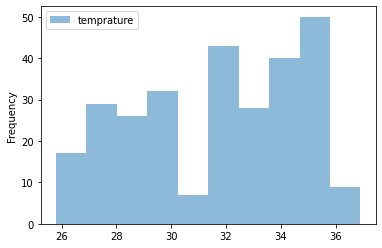

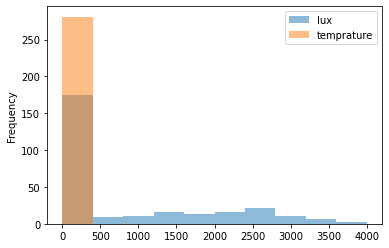

In [13]:
df_nulled_dated.plot.hist(x="lux", alpha=0.5)
df_nulled_dated.plot.hist(alpha=0.5)

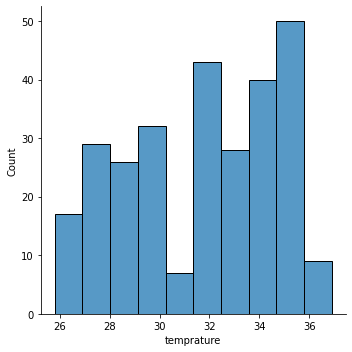

In [14]:
sns.displot(df_nulled_dated["temprature"])

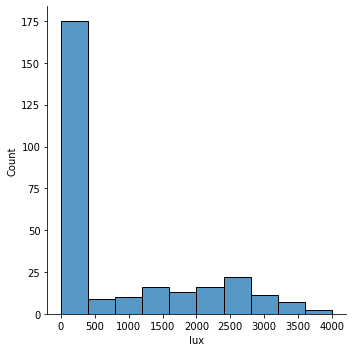

In [15]:
sns.displot(df_nulled_dated["lux"])

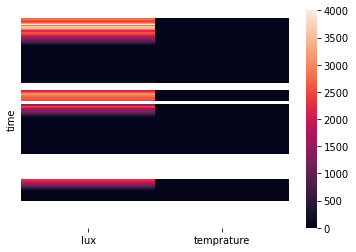

In [16]:
ax = sns.heatmap(df_nulled_dated, yticklabels=False)

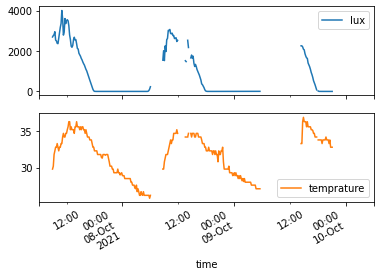

In [17]:
ax_time_temp = df_nulled_dated.plot.line(subplots=True)

In [18]:
df_interpolated_cubical = df_nulled_dated.interpolate("cubic")
df_interpolated_quadratic = df_nulled_dated.interpolate("quadratic")
df_ffil = df_nulled_dated.ffill()

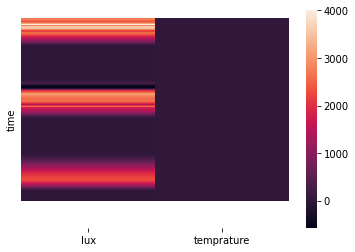

In [19]:
axC = sns.heatmap(df_interpolated_cubical, yticklabels=False)

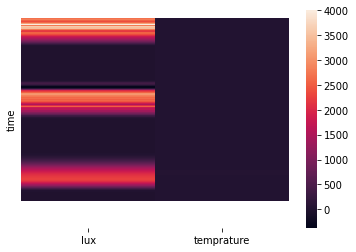

In [20]:
axQ = sns.heatmap(df_interpolated_quadratic, yticklabels=False)

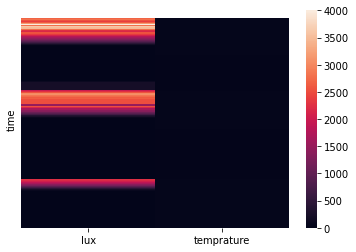

In [21]:
axF= sns.heatmap(df_ffil, yticklabels=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3303202990>,
      dtype=object)

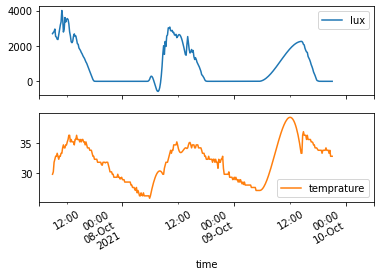

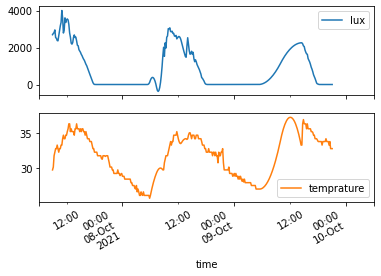

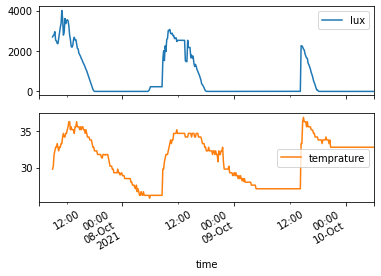

In [22]:
%matplotlib inline
df_interpolated_cubical.plot.line(subplots=True)
df_interpolated_quadratic.plot.line(subplots=True)
df_ffil.plot.line(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f32f8d49c50>,
      dtype=object)

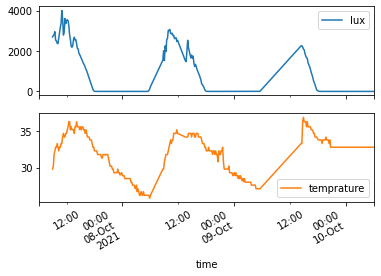

In [23]:
df_interpolated_time = df_nulled_dated.interpolate("time")
df_interpolated_time.plot.line(subplots=True)

lux              AxesSubplot(0.125,0.125;0.352273x0.755)
temprature    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

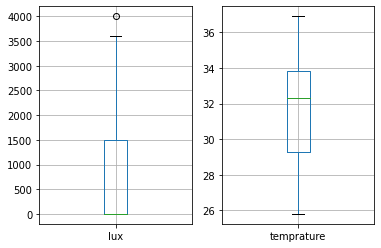

In [24]:
df = df_interpolated_time
df.plot.box(subplots=True, grid= True)

In [25]:
df.info()
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 432 entries, 2021-10-07 06:10:00+07:00 to 2021-10-10 06:00:00+07:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lux         415 non-null    float64
 1   temprature  415 non-null    float64
dtypes: float64(2)
memory usage: 10.1 KB
lux           1504.583167
temprature       4.547170
dtype: float64


In [26]:
df["lux"] = np.where(df["lux"] 
                     < Q1["lux"]-IQR["lux"]*1.5, Q1["lux"], df["lux"])
df["temprature"] = np.where(df["temprature"] 
                     < Q1["temprature"]-IQR["temprature"]*1.5, Q1["temprature"], df["temprature"])

df["lux"] = np.where(df["lux"] 
                     > Q3["lux"]-IQR["lux"]*1.5, Q1["lux"], df["lux"])
df["temprature"] = np.where(df["temprature"] 
                     > Q3["temprature"]-IQR["temprature"]*1.5, Q1["temprature"], df["temprature"])

df.describe()


,lux,temprature
count,4.150000e+02,415.000000
mean,8.333330e-01,29.113055
std,1.222719e-15,0.624662
min,8.333330e-01,25.800000
25%,8.333330e-01,29.252830
50%,8.333330e-01,29.252830
75%,8.333330e-01,29.252830
max,8.333330e-01,29.252830


In [27]:
df.skew()

lux           0.00000
temprature   -4.29423
dtype: float64

lux              AxesSubplot(0.125,0.125;0.352273x0.755)
temprature    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

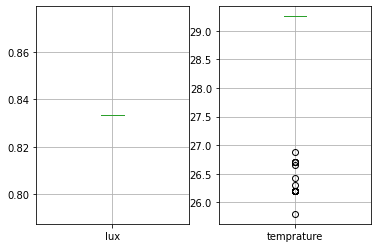

In [28]:
df.plot.box(subplots= True, grid = True)

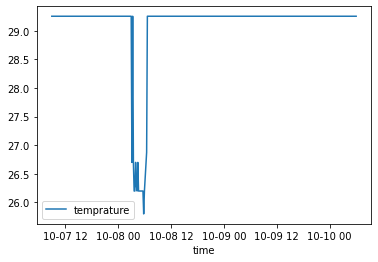

In [29]:
plot_time_time = sns.lineplot(data=[df["temprature"]])

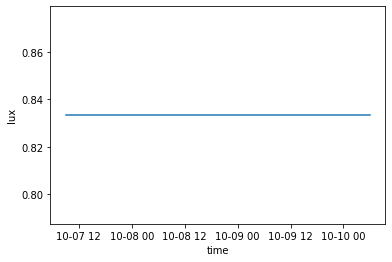

In [30]:
plot_temp_time = sns.lineplot(data=df["lux"])

In [31]:
df_d_avg = df.resample("D").mean()
df_h_avg = df.resample("H").mean()

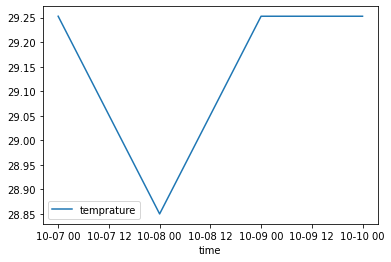

In [32]:
ax_davg_temp = sns.lineplot(data=[df_d_avg["temprature"]])

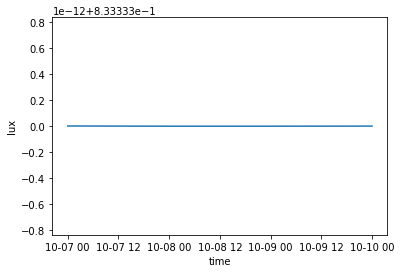

In [33]:
ax_davg_lux = sns.lineplot(data=df_d_avg["lux"])

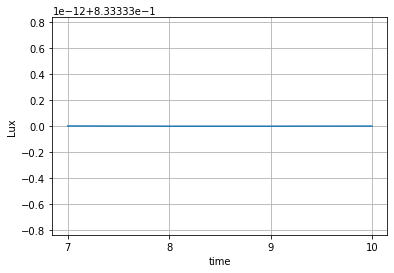

In [34]:
by_day = df.groupby(df.index.day).mean()
by_day["lux"].plot.line(ylabel="Lux", xticks=by_day.index, grid=True)

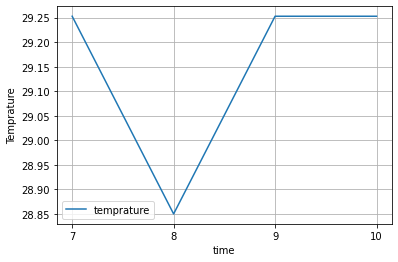

In [35]:
by_day[["temprature"]].plot.line(ylabel="Temprature", xticks= by_day.index, grid= True)

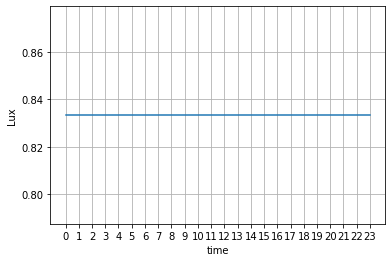

In [36]:
by_hour = df.groupby(df.index.hour).mean()
by_hour["lux"].plot.line(ylabel="Lux", xticks=by_hour.index, grid=True)

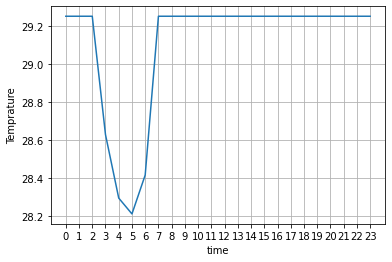

In [37]:

by_hour["temprature"].plot.line(ylabel="Temprature", xticks=by_hour.index, grid=True)

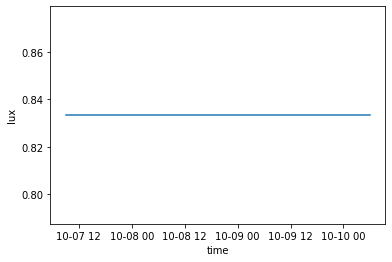

In [38]:
ax_havg_lux = sns.lineplot(data=df_h_avg["lux"])


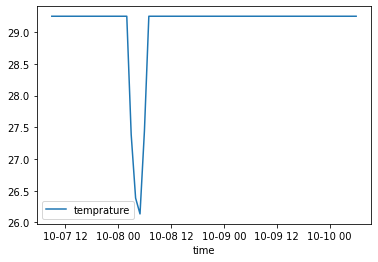

In [40]:
ax_havg_temp = sns.lineplot(data=[df_h_avg["temprature"]])

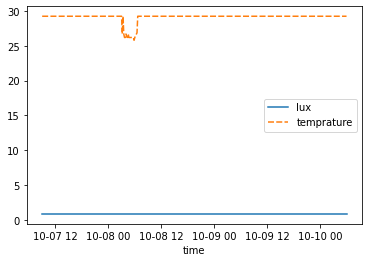

In [41]:
line_all = sns.lineplot(data=df)

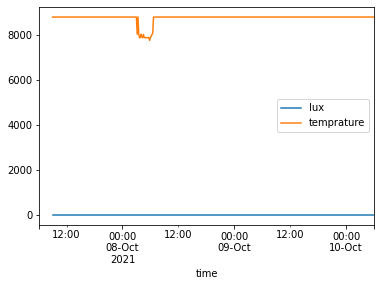

In [42]:
scaled_df = df.copy()
scaled_df["temprature"] = scaled_df["temprature"]*300

scaled_df.plot.line()

In [43]:
df

,lux,temprature
time,,
2021-10-07 06:10:00+07:00,NaN,NaN
2021-10-07 06:20:00+07:00,NaN,NaN
2021-10-07 06:30:00+07:00,NaN,NaN
2021-10-07 06:40:00+07:00,NaN,NaN
2021-10-07 06:50:00+07:00,NaN,NaN
...,...,...
2021-10-10 05:20:00+07:00,0.833333,29.25283
2021-10-10 05:30:00+07:00,0.833333,29.25283
2021-10-10 05:40:00+07:00,0.833333,29.25283


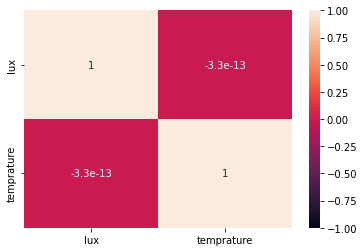

In [44]:
corr_hmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot = True)

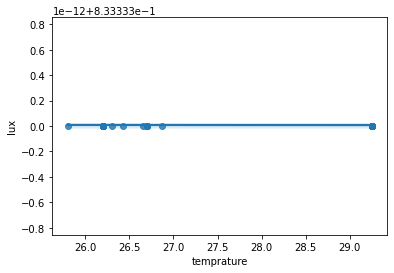

In [45]:
regplt_t2 = sns.regplot(x=df["temprature"], y=df["lux"], data=df, fit_reg=True)